<a href="https://colab.research.google.com/github/Ojas-Shukla/Credit-Card-Approval-Project/blob/main/Credit_Card_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.8.0
!pip install xgboost==3.1.3

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 99.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd


In [3]:
credit = pd.read_csv('/content/credit_record.csv')
app = pd.read_csv('/content/application_record.csv')

In [4]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
credit['bad_credit'] = credit['STATUS'].isin(['1','2','3','4','5']).astype(int)
credit_target = credit.groupby('ID')['bad_credit'].max().reset_index()

credit_target['Approved'] = 1 - credit_target['bad_credit']
credit_target.drop('bad_credit', axis=1, inplace=True)

In [7]:
df = app.merge(credit_target, on='ID', how='inner')
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Approved
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,1
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,1
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,1


**Our Target Column is Ready**

In [8]:
df['Approved'].value_counts(normalize=True)

,proportion
Approved,
1,0.8823
0,0.1177


**Data is Imabalanced**

In [9]:
df = df.drop(columns=['ID'], axis=1)
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])

In [10]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Approved
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0,0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,NaN,2.0,0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2.0,1
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,1
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,1


### **Features EDA**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          36457 non-null  object 
 1   FLAG_OWN_CAR         36457 non-null  object 
 2   FLAG_OWN_REALTY      36457 non-null  object 
 3   CNT_CHILDREN         36457 non-null  int64  
 4   AMT_INCOME_TOTAL     36457 non-null  float64
 5   NAME_INCOME_TYPE     36457 non-null  object 
 6   NAME_EDUCATION_TYPE  36457 non-null  object 
 7   NAME_FAMILY_STATUS   36457 non-null  object 
 8   NAME_HOUSING_TYPE    36457 non-null  object 
 9   DAYS_BIRTH           36457 non-null  int64  
 10  DAYS_EMPLOYED        36457 non-null  int64  
 11  FLAG_MOBIL           36457 non-null  int64  
 12  FLAG_WORK_PHONE      36457 non-null  int64  
 13  FLAG_PHONE           36457 non-null  int64  
 14  FLAG_EMAIL           36457 non-null  int64  
 15  OCCUPATION_TYPE      25134 non-null 

In [13]:
df.isnull().sum()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0
DAYS_BIRTH,0


In [14]:
# Handling null values
df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2198591648.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)


In [15]:
df.isnull().sum()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0
DAYS_BIRTH,0


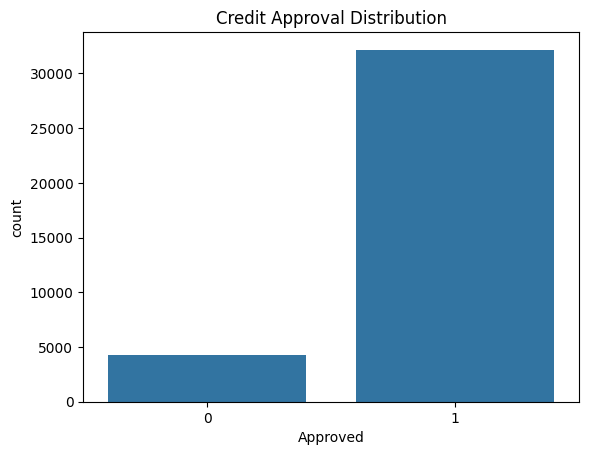

In [16]:
sns.countplot(data=df, x='Approved')
plt.title('Credit Approval Distribution')
plt.show()


In [17]:
x = df.drop('Approved', axis=1)
y = df['Approved']

In [18]:
num_cols = x.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS'],
      dtype='object')

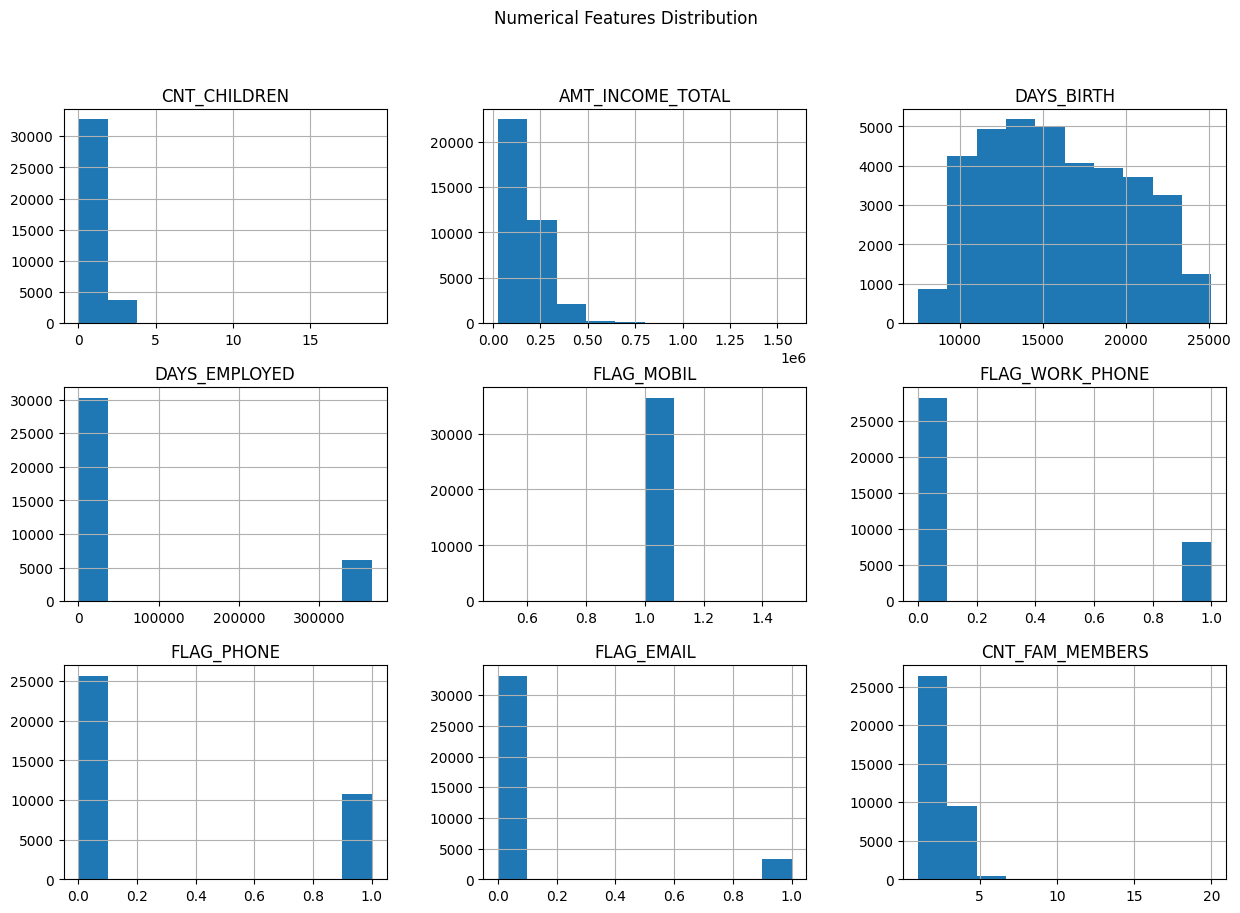

In [19]:
df[num_cols].hist(figsize=(15,10))
plt.suptitle('Numerical Features Distribution')
plt.show()

#### **Outlier Analysis**

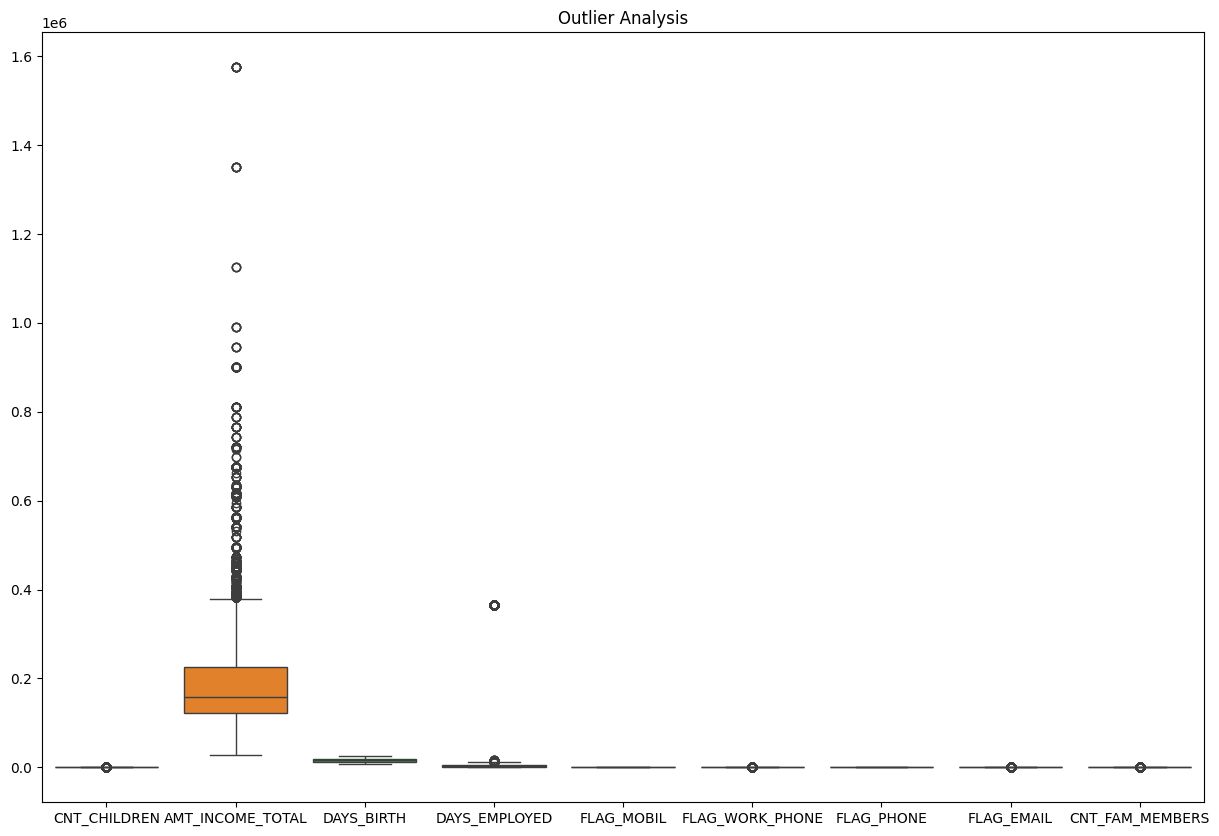

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[num_cols])
plt.title('Outlier Analysis')
plt.show()

**Insights : Income and no of days employed have lot of outliers**

In [21]:
cat_cols = x.select_dtypes(include=['object']).columns
cat_cols

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')

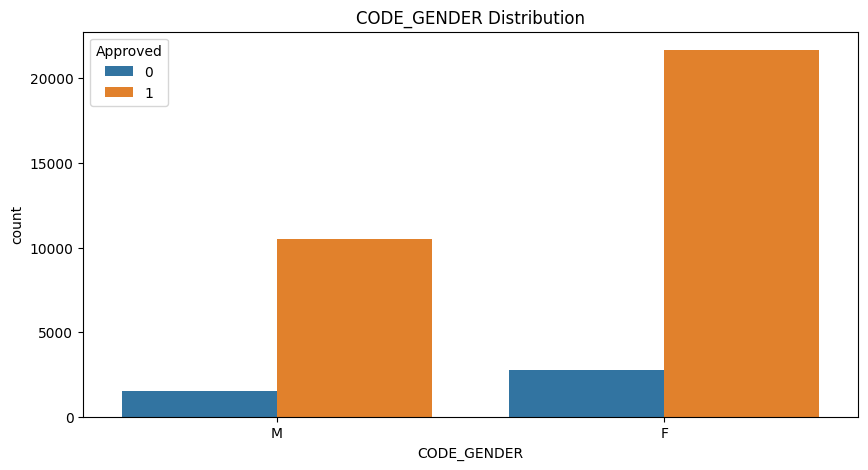

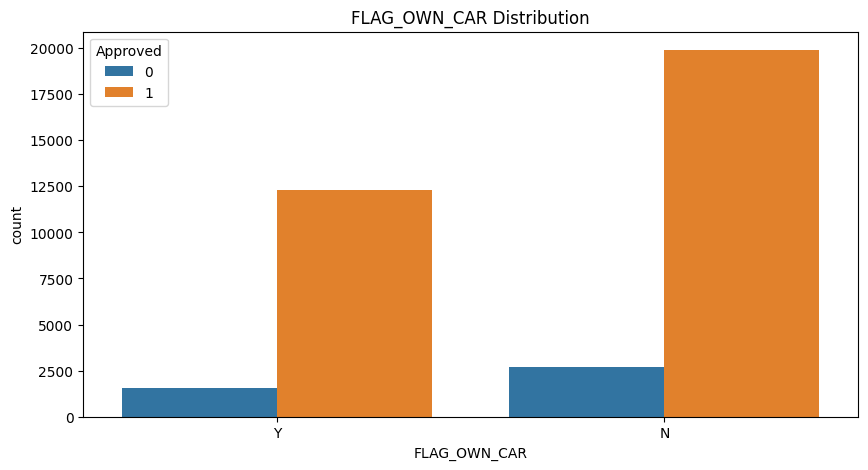

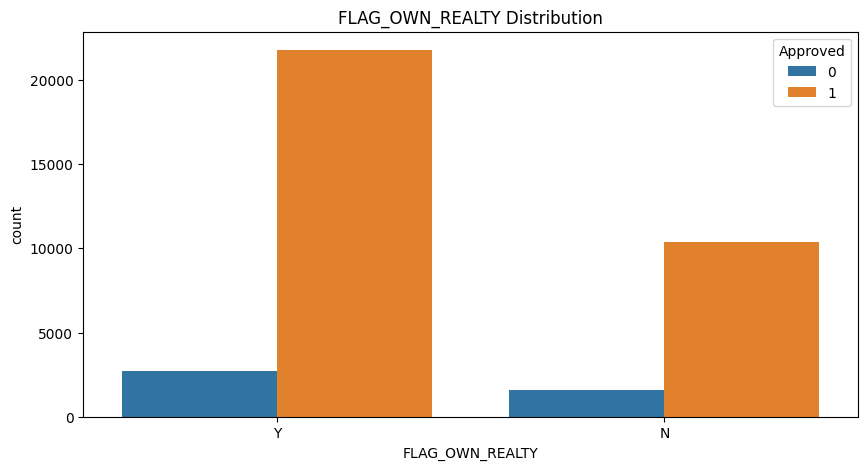

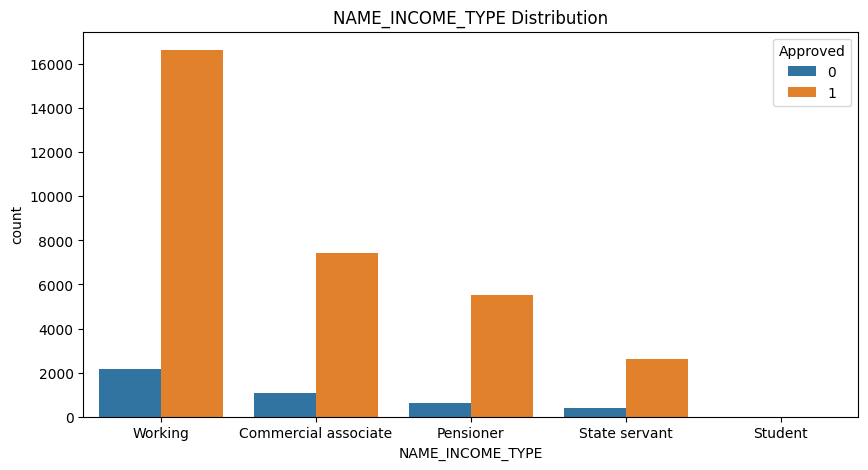

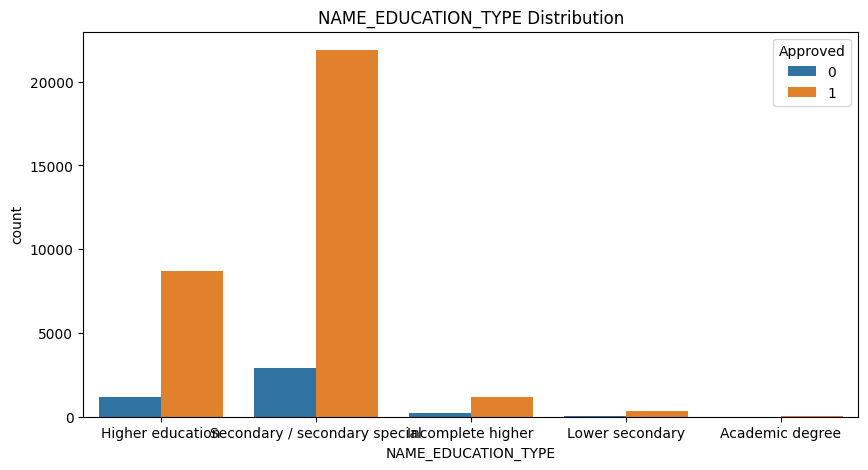

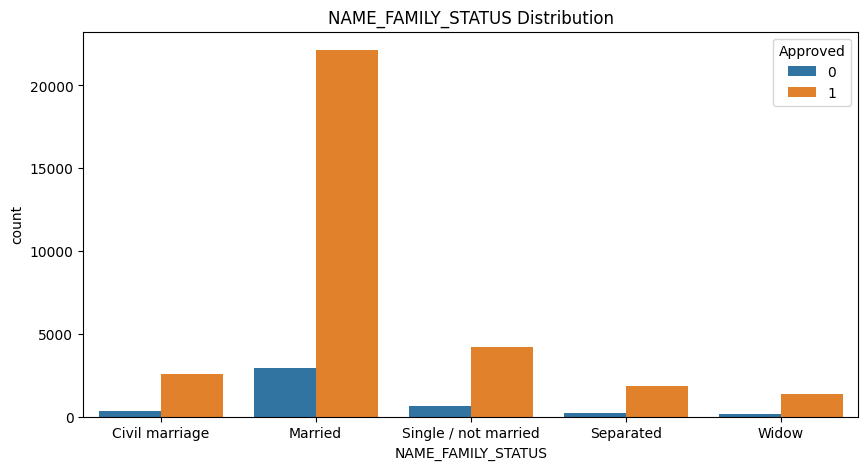

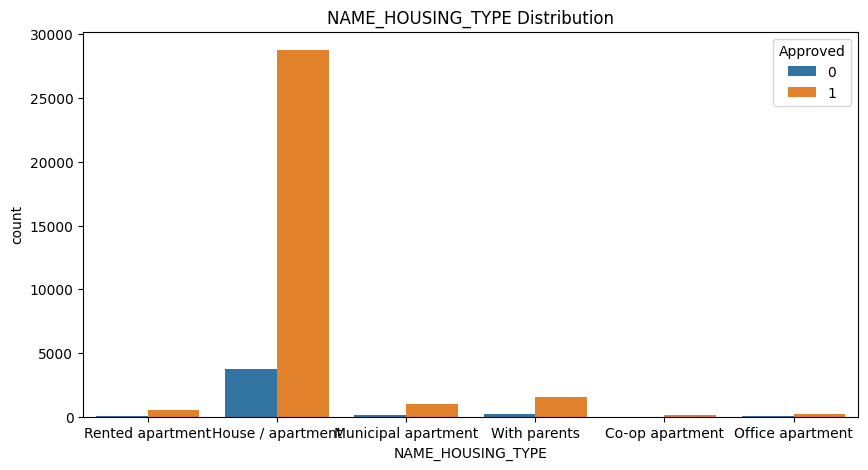

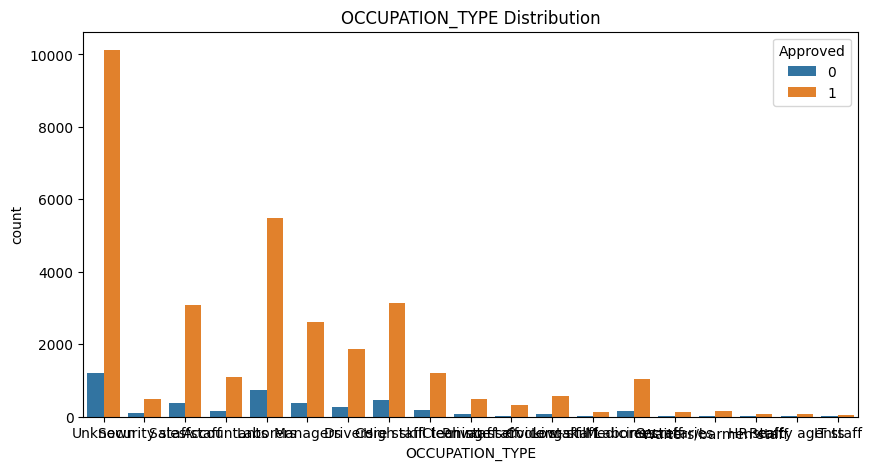

In [22]:
for col in cat_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(data=df, x=col, hue='Approved')
  plt.title(f'{col} Distribution')
  plt.show()

**Insights**
1. Females are approved more credit cards than males
2. Property owners are approved more credit cards
3. Education level impacts approval
4. Housing type as Apartments are majorily approved
5. Income type and family status is strongly correlated

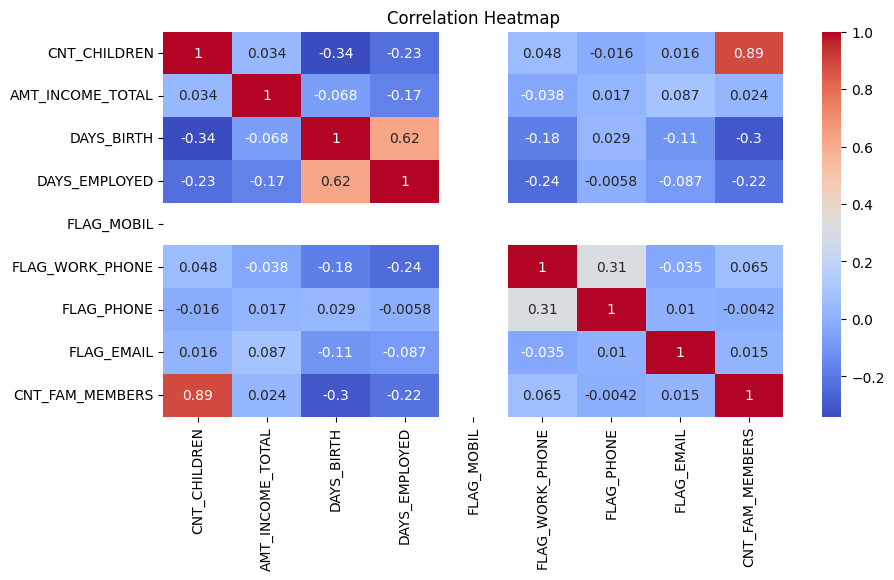

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Preprocessing**

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [27]:
x_train_prep = preprocessor.fit_transform(x_train)
x_test_prep = preprocessor.transform(x_test)

**Handling Oversampling of Data**

In [28]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [29]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_prep, y_train)
y_train_resampled.value_counts()

,count
Approved,
1,25732
0,25732


### **Model Building**

In [30]:
!pip install catboost
!pip install imbalanced-learn
!pip install optuna
!pip install xgboost
!pip install lightgbm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import optuna
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 13.3 MB/s eta 0:00:00


In [31]:
def evaluate_model(model):
  fit_params = {}

  if hasattr(model, 'early_stopping_rounds') and model.early_stopping_rounds is not None:
    fit_params['eval_set'] = [(x_test_prep, y_test)]


  model.fit(x_train_resampled, y_train_resampled, **fit_params)
  y_pred = model.predict_proba(x_test_prep)[:,1]
  return roc_auc_score(y_test, y_pred)

In [32]:
def optuna_lr(trial):
  model = LogisticRegression(
      C=trial.suggest_float('C', 0.001, 10),
      penalty=trial.suggest_categorical('penalty', ['l1', 'l2']),
      solver=trial.suggest_categorical('solver', ['liblinear', 'saga']),
      random_state=42
  )
  return evaluate_model(model)

In [33]:
def optuna_dt(trial):
  model = DecisionTreeClassifier(
      criterion=trial.suggest_categorical('criterion', ['gini', 'entropy']),
      max_depth=trial.suggest_int('max_depth', 2, 10),
      min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
      min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
      random_state=42
  )
  return evaluate_model(model)

In [34]:
def optuna_rf(trial):
  model = RandomForestClassifier(
      n_estimators=trial.suggest_int('n_estimators', 100, 500),
      max_depth=trial.suggest_int('max_depth', 2, 10),
      min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
      min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
      n_jobs=-1,
      random_state=42
  )
  return evaluate_model(model)

In [35]:
def optuna_gb(trial):
  model = GradientBoostingClassifier(
      n_estimators=trial.suggest_int('n_estimators', 100, 500),
      learning_rate=trial.suggest_float('learning_rate', 0.001, 0.5),
      max_depth=trial.suggest_int('max_depth', 2, 10),
      min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
      random_state=42
  )
  return evaluate_model(model)

In [36]:
def optuna_xgb(trial):
  model = XGBClassifier(
      n_estimators=trial.suggest_int('n_estimators', 200, 800),
      max_depth=trial.suggest_int('max_depth', 2, 10),
      early_stopping_rounds=20,
      learning_rate=trial.suggest_float('learning_rate', 0.001, 0.5),
      subsample=trial.suggest_float('subsample', 0.5, 1),
      colsample_bytree=trial.suggest_float('colsample_bytree', 0.5, 1),
      gamma=trial.suggest_float('gamma', 0.001, 1),
      eval_metric='auc',
      n_jobs=-1,
      random_state=42
  )
  return evaluate_model(model)

In [37]:
def optuna_lgbm(trial):
  model = LGBMClassifier(
      n_estimators=trial.suggest_int('n_estimators', 200, 800),
      max_depth=trial.suggest_int('max_depth', 2, 10),
      learning_rate=trial.suggest_float('learning_rate', 0.001, 0.5),
      subsample=trial.suggest_float('subsample', 0.5, 1),
      colsample_bytree=trial.suggest_float('colsample_bytree', 0.5, 1),
      early_stopping_rounds=20,
      eval_metric='auc',
      n_jobs=-1,
      random_state=42
  )
  return evaluate_model(model)

In [38]:
def optuna_cat(trial):
  model = CatBoostClassifier(
      iterations=trial.suggest_int('iterations', 200, 800),
      learning_rate=trial.suggest_float('learning_rate', 0.001, 0.5),
      depth=trial.suggest_int('depth', 2, 10),
      random_state=42
  )
  return evaluate_model(model)

In [39]:
studies = {
    "LogisticRegression": optuna_lr,
    "DecisionTree": optuna_dt,
    "RandomForest": optuna_rf,
    "GradientBoosting": optuna_gb,
    "XGBoost": optuna_xgb,
    "LightGBM": optuna_lgbm,
    "CatBoost": optuna_cat
}

results = []

for name, func in studies.items():
    study = optuna.create_study(direction="maximize")
    study.optimize(func, n_trials=10)

    results.append({
        "Model": name,
        "Best ROC-AUC": study.best_value,
        "Best Params": study.best_params
    })

[I 2026-02-01 08:32:46,358] A new study created in memory with name: no-name-b1a64d75-9635-44bf-b8ee-5eaac216c05e
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2026-02-01 08:32:57,321] Trial 0 finished with value: 0.535175256305191 and parameters: {'C': 6.69131784

[0]	validation_0-auc:0.51357
[1]	validation_0-auc:0.53603
[2]	validation_0-auc:0.53485
[3]	validation_0-auc:0.54923
[4]	validation_0-auc:0.55451
[5]	validation_0-auc:0.56188
[6]	validation_0-auc:0.56411
[7]	validation_0-auc:0.56279
[8]	validation_0-auc:0.56149
[9]	validation_0-auc:0.56587
[10]	validation_0-auc:0.56956
[11]	validation_0-auc:0.57434
[12]	validation_0-auc:0.58352
[13]	validation_0-auc:0.58343
[14]	validation_0-auc:0.58482
[15]	validation_0-auc:0.59011
[16]	validation_0-auc:0.58997
[17]	validation_0-auc:0.59745
[18]	validation_0-auc:0.60046
[19]	validation_0-auc:0.60094
[20]	validation_0-auc:0.60170
[21]	validation_0-auc:0.60506
[22]	validation_0-auc:0.60934
[23]	validation_0-auc:0.60996
[24]	validation_0-auc:0.61448
[25]	validation_0-auc:0.61609
[26]	validation_0-auc:0.61607
[27]	validation_0-auc:0.61921
[28]	validation_0-auc:0.62002
[29]	validation_0-auc:0.62013
[30]	validation_0-auc:0.61915
[31]	validation_0-auc:0.61970
[32]	validation_0-auc:0.62064
[33]	validation_0-au

[I 2026-02-01 08:48:30,935] Trial 0 finished with value: 0.7230306218493971 and parameters: {'n_estimators': 268, 'max_depth': 7, 'learning_rate': 0.2402754462359676, 'subsample': 0.5730036556846867, 'colsample_bytree': 0.6152179815706118, 'gamma': 0.8507352137720215}. Best is trial 0 with value: 0.7230306218493971.


[0]	validation_0-auc:0.53955
[1]	validation_0-auc:0.56186
[2]	validation_0-auc:0.55936
[3]	validation_0-auc:0.58022
[4]	validation_0-auc:0.58120
[5]	validation_0-auc:0.58562
[6]	validation_0-auc:0.58924
[7]	validation_0-auc:0.58939
[8]	validation_0-auc:0.58687
[9]	validation_0-auc:0.58705
[10]	validation_0-auc:0.58938
[11]	validation_0-auc:0.59322
[12]	validation_0-auc:0.59402
[13]	validation_0-auc:0.59609
[14]	validation_0-auc:0.59893
[15]	validation_0-auc:0.60317
[16]	validation_0-auc:0.60322
[17]	validation_0-auc:0.60459
[18]	validation_0-auc:0.60592
[19]	validation_0-auc:0.60743
[20]	validation_0-auc:0.60851
[21]	validation_0-auc:0.60918
[22]	validation_0-auc:0.61034
[23]	validation_0-auc:0.60959
[24]	validation_0-auc:0.60944
[25]	validation_0-auc:0.61155
[26]	validation_0-auc:0.61124
[27]	validation_0-auc:0.61319
[28]	validation_0-auc:0.61264
[29]	validation_0-auc:0.61221
[30]	validation_0-auc:0.61262
[31]	validation_0-auc:0.61392
[32]	validation_0-auc:0.61453
[33]	validation_0-au

[I 2026-02-01 08:48:32,977] Trial 1 finished with value: 0.6213882868763192 and parameters: {'n_estimators': 355, 'max_depth': 9, 'learning_rate': 0.004135476212518309, 'subsample': 0.6210403816110979, 'colsample_bytree': 0.5192399585301726, 'gamma': 0.33842723652821144}. Best is trial 0 with value: 0.7230306218493971.


[0]	validation_0-auc:0.55017
[1]	validation_0-auc:0.57159
[2]	validation_0-auc:0.57809
[3]	validation_0-auc:0.59399
[4]	validation_0-auc:0.59919
[5]	validation_0-auc:0.60106
[6]	validation_0-auc:0.60123
[7]	validation_0-auc:0.60461
[8]	validation_0-auc:0.60600
[9]	validation_0-auc:0.60649
[10]	validation_0-auc:0.60803
[11]	validation_0-auc:0.60743
[12]	validation_0-auc:0.61340
[13]	validation_0-auc:0.61964
[14]	validation_0-auc:0.61784
[15]	validation_0-auc:0.62044
[16]	validation_0-auc:0.62294
[17]	validation_0-auc:0.62586
[18]	validation_0-auc:0.62996
[19]	validation_0-auc:0.62859
[20]	validation_0-auc:0.63167
[21]	validation_0-auc:0.63917
[22]	validation_0-auc:0.64038
[23]	validation_0-auc:0.64368
[24]	validation_0-auc:0.64546
[25]	validation_0-auc:0.64679
[26]	validation_0-auc:0.64640
[27]	validation_0-auc:0.64919
[28]	validation_0-auc:0.64947
[29]	validation_0-auc:0.65039
[30]	validation_0-auc:0.65449
[31]	validation_0-auc:0.65446
[32]	validation_0-auc:0.65543
[33]	validation_0-au

[I 2026-02-01 08:48:44,153] Trial 2 finished with value: 0.7510548202186375 and parameters: {'n_estimators': 435, 'max_depth': 9, 'learning_rate': 0.18015119712000707, 'subsample': 0.8471827433359884, 'colsample_bytree': 0.5761798283756565, 'gamma': 0.3978114603716067}. Best is trial 2 with value: 0.7510548202186375.


[0]	validation_0-auc:0.54541
[1]	validation_0-auc:0.55283
[2]	validation_0-auc:0.55410
[3]	validation_0-auc:0.56112
[4]	validation_0-auc:0.56012
[5]	validation_0-auc:0.56649
[6]	validation_0-auc:0.56723
[7]	validation_0-auc:0.56807
[8]	validation_0-auc:0.56829
[9]	validation_0-auc:0.56332
[10]	validation_0-auc:0.56396
[11]	validation_0-auc:0.56147
[12]	validation_0-auc:0.56449
[13]	validation_0-auc:0.56740
[14]	validation_0-auc:0.56682
[15]	validation_0-auc:0.56662
[16]	validation_0-auc:0.57138
[17]	validation_0-auc:0.57253
[18]	validation_0-auc:0.57538
[19]	validation_0-auc:0.57644
[20]	validation_0-auc:0.57394
[21]	validation_0-auc:0.57567
[22]	validation_0-auc:0.57560
[23]	validation_0-auc:0.57611
[24]	validation_0-auc:0.58101
[25]	validation_0-auc:0.58784
[26]	validation_0-auc:0.58965
[27]	validation_0-auc:0.58976
[28]	validation_0-auc:0.59044
[29]	validation_0-auc:0.59229
[30]	validation_0-auc:0.59285
[31]	validation_0-auc:0.59174
[32]	validation_0-auc:0.59166
[33]	validation_0-au

[I 2026-02-01 08:48:49,659] Trial 3 finished with value: 0.6448293701946174 and parameters: {'n_estimators': 260, 'max_depth': 6, 'learning_rate': 0.07803514045463006, 'subsample': 0.8272711879429118, 'colsample_bytree': 0.6221030536553722, 'gamma': 0.9623844301712591}. Best is trial 2 with value: 0.7510548202186375.


[0]	validation_0-auc:0.54524
[1]	validation_0-auc:0.56809
[2]	validation_0-auc:0.57231
[3]	validation_0-auc:0.58837
[4]	validation_0-auc:0.59451
[5]	validation_0-auc:0.59324
[6]	validation_0-auc:0.59844
[7]	validation_0-auc:0.59908
[8]	validation_0-auc:0.59759
[9]	validation_0-auc:0.60167
[10]	validation_0-auc:0.60644
[11]	validation_0-auc:0.60614
[12]	validation_0-auc:0.61031
[13]	validation_0-auc:0.61311
[14]	validation_0-auc:0.61559
[15]	validation_0-auc:0.61722
[16]	validation_0-auc:0.61881
[17]	validation_0-auc:0.61733
[18]	validation_0-auc:0.61839
[19]	validation_0-auc:0.61731
[20]	validation_0-auc:0.61647
[21]	validation_0-auc:0.61795
[22]	validation_0-auc:0.61875
[23]	validation_0-auc:0.61907
[24]	validation_0-auc:0.62026
[25]	validation_0-auc:0.62326
[26]	validation_0-auc:0.62442
[27]	validation_0-auc:0.62549
[28]	validation_0-auc:0.62610
[29]	validation_0-auc:0.62528
[30]	validation_0-auc:0.62701
[31]	validation_0-auc:0.62915
[32]	validation_0-auc:0.62869
[33]	validation_0-au

[I 2026-02-01 08:49:03,789] Trial 4 finished with value: 0.735343016738727 and parameters: {'n_estimators': 433, 'max_depth': 8, 'learning_rate': 0.1071266534466103, 'subsample': 0.5352728793433086, 'colsample_bytree': 0.9240955748159848, 'gamma': 0.31824992917416534}. Best is trial 2 with value: 0.7510548202186375.


[0]	validation_0-auc:0.51405
[1]	validation_0-auc:0.51414
[2]	validation_0-auc:0.51342
[3]	validation_0-auc:0.51319
[4]	validation_0-auc:0.51652
[5]	validation_0-auc:0.52636
[6]	validation_0-auc:0.52441
[7]	validation_0-auc:0.51664
[8]	validation_0-auc:0.51466
[9]	validation_0-auc:0.51225
[10]	validation_0-auc:0.51291
[11]	validation_0-auc:0.51866
[12]	validation_0-auc:0.51838
[13]	validation_0-auc:0.52280
[14]	validation_0-auc:0.52503
[15]	validation_0-auc:0.52220
[16]	validation_0-auc:0.52178
[17]	validation_0-auc:0.52584
[18]	validation_0-auc:0.52325
[19]	validation_0-auc:0.52377
[20]	validation_0-auc:0.52617
[21]	validation_0-auc:0.52728
[22]	validation_0-auc:0.52667
[23]	validation_0-auc:0.52614
[24]	validation_0-auc:0.52475
[25]	validation_0-auc:0.52836
[26]	validation_0-auc:0.53060
[27]	validation_0-auc:0.53104
[28]	validation_0-auc:0.52982
[29]	validation_0-auc:0.53142
[30]	validation_0-auc:0.53255
[31]	validation_0-auc:0.53380
[32]	validation_0-auc:0.53620
[33]	validation_0-au

[I 2026-02-01 08:49:05,724] Trial 5 finished with value: 0.5975832788080223 and parameters: {'n_estimators': 266, 'max_depth': 3, 'learning_rate': 0.4126811876841205, 'subsample': 0.5378484620044174, 'colsample_bytree': 0.5029694380232239, 'gamma': 0.024098203715289382}. Best is trial 2 with value: 0.7510548202186375.


[0]	validation_0-auc:0.53665
[1]	validation_0-auc:0.53661
[2]	validation_0-auc:0.54993
[3]	validation_0-auc:0.55661
[4]	validation_0-auc:0.55292
[5]	validation_0-auc:0.54993
[6]	validation_0-auc:0.55209
[7]	validation_0-auc:0.55324
[8]	validation_0-auc:0.55843
[9]	validation_0-auc:0.55841
[10]	validation_0-auc:0.55751
[11]	validation_0-auc:0.55845
[12]	validation_0-auc:0.55863
[13]	validation_0-auc:0.56046
[14]	validation_0-auc:0.56304
[15]	validation_0-auc:0.56172
[16]	validation_0-auc:0.56003
[17]	validation_0-auc:0.55825
[18]	validation_0-auc:0.55751
[19]	validation_0-auc:0.55589
[20]	validation_0-auc:0.55685
[21]	validation_0-auc:0.55781
[22]	validation_0-auc:0.55880
[23]	validation_0-auc:0.56014
[24]	validation_0-auc:0.56088
[25]	validation_0-auc:0.56276
[26]	validation_0-auc:0.56221
[27]	validation_0-auc:0.56259
[28]	validation_0-auc:0.56162
[29]	validation_0-auc:0.56221
[30]	validation_0-auc:0.56275
[31]	validation_0-auc:0.56454
[32]	validation_0-auc:0.56460
[33]	validation_0-au

[I 2026-02-01 08:49:17,037] Trial 6 finished with value: 0.6593557463156468 and parameters: {'n_estimators': 626, 'max_depth': 5, 'learning_rate': 0.06977284026650675, 'subsample': 0.5163160188867445, 'colsample_bytree': 0.8360313961299592, 'gamma': 0.9017480387784155}. Best is trial 2 with value: 0.7510548202186375.


[0]	validation_0-auc:0.55735
[1]	validation_0-auc:0.57934
[2]	validation_0-auc:0.58419
[3]	validation_0-auc:0.60862
[4]	validation_0-auc:0.61329
[5]	validation_0-auc:0.61748
[6]	validation_0-auc:0.62833
[7]	validation_0-auc:0.62994
[8]	validation_0-auc:0.63060
[9]	validation_0-auc:0.64476
[10]	validation_0-auc:0.64578
[11]	validation_0-auc:0.64784
[12]	validation_0-auc:0.64844
[13]	validation_0-auc:0.65426
[14]	validation_0-auc:0.65808
[15]	validation_0-auc:0.66147
[16]	validation_0-auc:0.66433
[17]	validation_0-auc:0.67578
[18]	validation_0-auc:0.67863
[19]	validation_0-auc:0.67782
[20]	validation_0-auc:0.68423
[21]	validation_0-auc:0.68468
[22]	validation_0-auc:0.69138
[23]	validation_0-auc:0.69372
[24]	validation_0-auc:0.69375
[25]	validation_0-auc:0.69921
[26]	validation_0-auc:0.70038
[27]	validation_0-auc:0.70239
[28]	validation_0-auc:0.70309
[29]	validation_0-auc:0.70456
[30]	validation_0-auc:0.70617
[31]	validation_0-auc:0.70619
[32]	validation_0-auc:0.70782
[33]	validation_0-au

[I 2026-02-01 08:49:25,182] Trial 7 finished with value: 0.7529040615378819 and parameters: {'n_estimators': 528, 'max_depth': 10, 'learning_rate': 0.38199216671260455, 'subsample': 0.6336756607011241, 'colsample_bytree': 0.556124476359524, 'gamma': 0.01645248806351967}. Best is trial 7 with value: 0.7529040615378819.


[0]	validation_0-auc:0.52614
[1]	validation_0-auc:0.53338
[2]	validation_0-auc:0.53090
[3]	validation_0-auc:0.53693
[4]	validation_0-auc:0.54018
[5]	validation_0-auc:0.54283
[6]	validation_0-auc:0.54874
[7]	validation_0-auc:0.55295
[8]	validation_0-auc:0.55407
[9]	validation_0-auc:0.55564
[10]	validation_0-auc:0.55592
[11]	validation_0-auc:0.55432
[12]	validation_0-auc:0.55507
[13]	validation_0-auc:0.55756
[14]	validation_0-auc:0.55563
[15]	validation_0-auc:0.55925
[16]	validation_0-auc:0.56023
[17]	validation_0-auc:0.56033
[18]	validation_0-auc:0.56163
[19]	validation_0-auc:0.55986
[20]	validation_0-auc:0.56186
[21]	validation_0-auc:0.56365
[22]	validation_0-auc:0.56545
[23]	validation_0-auc:0.56457
[24]	validation_0-auc:0.57044
[25]	validation_0-auc:0.57167
[26]	validation_0-auc:0.57367
[27]	validation_0-auc:0.57237
[28]	validation_0-auc:0.57279
[29]	validation_0-auc:0.57457
[30]	validation_0-auc:0.57412
[31]	validation_0-auc:0.57338
[32]	validation_0-auc:0.57401
[33]	validation_0-au

[I 2026-02-01 08:49:34,886] Trial 8 finished with value: 0.6793380047576504 and parameters: {'n_estimators': 689, 'max_depth': 5, 'learning_rate': 0.14346933245057283, 'subsample': 0.9145735844233136, 'colsample_bytree': 0.6497786913513669, 'gamma': 0.789085678623398}. Best is trial 7 with value: 0.7529040615378819.


[0]	validation_0-auc:0.51576
[1]	validation_0-auc:0.51599
[2]	validation_0-auc:0.51172
[3]	validation_0-auc:0.51928
[4]	validation_0-auc:0.52236
[5]	validation_0-auc:0.51965
[6]	validation_0-auc:0.52093
[7]	validation_0-auc:0.52191
[8]	validation_0-auc:0.52256
[9]	validation_0-auc:0.52164
[10]	validation_0-auc:0.51951
[11]	validation_0-auc:0.52367
[12]	validation_0-auc:0.52152
[13]	validation_0-auc:0.52162
[14]	validation_0-auc:0.51986
[15]	validation_0-auc:0.52125
[16]	validation_0-auc:0.52168
[17]	validation_0-auc:0.51992
[18]	validation_0-auc:0.52248
[19]	validation_0-auc:0.52235
[20]	validation_0-auc:0.52272
[21]	validation_0-auc:0.52159
[22]	validation_0-auc:0.51805
[23]	validation_0-auc:0.51924
[24]	validation_0-auc:0.51860
[25]	validation_0-auc:0.52044
[26]	validation_0-auc:0.51907
[27]	validation_0-auc:0.51969
[28]	validation_0-auc:0.51901
[29]	validation_0-auc:0.51847
[30]	validation_0-auc:0.51964
[31]	validation_0-auc:0.51820


[I 2026-02-01 08:49:35,386] Trial 9 finished with value: 0.5236698722477398 and parameters: {'n_estimators': 558, 'max_depth': 2, 'learning_rate': 0.3461920537648652, 'subsample': 0.5081829602146668, 'colsample_bytree': 0.5701181969795934, 'gamma': 0.09927641730532408}. Best is trial 7 with value: 0.7529040615378819.
[I 2026-02-01 08:49:35,388] A new study created in memory with name: no-name-589bbe09-bdf3-475c-abb9-2ef345a5ac1f


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25732, number of negative: 25732
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.173899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10175
[LightGBM] [Info] Number of data points in the train set: 51464, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 20 rounds
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-02-01 08:49:38,560] Trial 0 finished with value: 0.7364298094403782 and parameters: {'n_estimators': 393, 'max_depth': 6, 'learning_rate': 0.44427052508387127, 'subsample': 0.6953342763295429, 'colsample_bytree': 0.9255992587647315}. Best is trial 0 with value: 0.7364298094403782.


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25732, number of negative: 25732
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10175
[LightGBM] [Info] Number of data points in the train set: 51464, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-02-01 08:49:39,874] Trial 1 finished with value: 0.5598944237815857 and parameters: {'n_estimators': 237, 'max_depth': 4, 'learning_rate': 0.029993089825057377, 'subsample': 0.8475065014717584, 'colsample_bytree': 0.9923927212998114}. Best is trial 0 with value: 0.7364298094403782.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[237]	valid_0's binary_logloss: 0.545254
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25732, number of negative: 25732
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10175
[LightGBM] [Info] Number of data points in the train set: 51464, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-02-01 08:49:42,243] Trial 2 finished with value: 0.613597779280092 and parameters: {'n_estimators': 441, 'max_depth': 3, 'learning_rate': 0.23740130189638678, 'subsample': 0.7861895697045422, 'colsample_bytree': 0.6146931516636196}. Best is trial 0 with value: 0.7364298094403782.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[441]	valid_0's binary_logloss: 0.42706
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Numb

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-02-01 08:49:44,008] Trial 3 finished with value: 0.7354578640714793 and parameters: {'n_estimators': 414, 'max_depth': 8, 'learning_rate': 0.3202228611551955, 'subsample': 0.9676651127433553, 'colsample_bytree': 0.9905380915534543}. Best is trial 0 with value: 0.7364298094403782.


Early stopping, best iteration is:
[242]	valid_0's binary_logloss: 0.357067
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25732, number of negative: 25732
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10175
[LightGBM] [Info] Number of data points in the train set: 51464, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [bina

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-02-01 08:49:48,518] Trial 4 finished with value: 0.7408201838571747 and parameters: {'n_estimators': 647, 'max_depth': 10, 'learning_rate': 0.1893899031294425, 'subsample': 0.8446265509885975, 'colsample_bytree': 0.561604288985508}. Best is trial 4 with value: 0.7408201838571747.


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25732, number of negative: 25732
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.111670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10175
[LightGBM] [Info] Number of data points in the train set: 51464, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-02-01 08:49:52,914] Trial 5 finished with value: 0.6611683958979575 and parameters: {'n_estimators': 681, 'max_depth': 3, 'learning_rate': 0.35986621855406636, 'subsample': 0.9450762992934236, 'colsample_bytree': 0.6314848513362232}. Best is trial 4 with value: 0.7408201838571747.


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25732, number of negative: 25732
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10175
[LightGBM] [Info] Number of data points in the train set: 51464, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 20 rounds
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-02-01 08:49:55,063] Trial 6 finished with value: 0.6095045768654721 and parameters: {'n_estimators': 286, 'max_depth': 7, 'learning_rate': 0.0314608279392029, 'subsample': 0.5641743332186169, 'colsample_bytree': 0.9332507044422635}. Best is trial 4 with value: 0.7408201838571747.


Did not meet early stopping. Best iteration is:
[286]	valid_0's binary_logloss: 0.469607
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25732, number of negative: 25732
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10175
[LightGBM] [Info] Number of data points in the train set: 51464, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-02-01 08:49:56,825] Trial 7 finished with value: 0.7322509243942257 and parameters: {'n_estimators': 297, 'max_depth': 7, 'learning_rate': 0.34292879291136086, 'subsample': 0.9499768008191938, 'colsample_bytree': 0.973698319733157}. Best is trial 4 with value: 0.7408201838571747.


Early stopping, best iteration is:
[247]	valid_0's binary_logloss: 0.361165
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25732, number of negative: 25732
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10175
[LightGBM] [Info] Number of data points in the train set: 51464, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [bina

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-02-01 08:49:59,059] Trial 8 finished with value: 0.5726929272157746 and parameters: {'n_estimators': 374, 'max_depth': 2, 'learning_rate': 0.3170084276183965, 'subsample': 0.6827293008237958, 'colsample_bytree': 0.5522568558142271}. Best is trial 4 with value: 0.7408201838571747.


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25732, number of negative: 25732
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10175
[LightGBM] [Info] Number of data points in the train set: 51464, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 20 rounds
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-02-01 08:50:04,811] Trial 9 finished with value: 0.7361738484290552 and parameters: {'n_estimators': 770, 'max_depth': 7, 'learning_rate': 0.13718930031276125, 'subsample': 0.7878719056881431, 'colsample_bytree': 0.8448317963316412}. Best is trial 4 with value: 0.7408201838571747.
[I 2026-02-01 08:50:04,813] A new study created in memory with name: no-name-1b588f0e-bc7f-4e75-aace-a5ea1be948ba


0:	learn: 0.6607402	total: 67.4ms	remaining: 19.7s
1:	learn: 0.6242676	total: 85.9ms	remaining: 12.5s
2:	learn: 0.5876608	total: 106ms	remaining: 10.2s
3:	learn: 0.5719094	total: 122ms	remaining: 8.86s
4:	learn: 0.5609486	total: 139ms	remaining: 8.02s
5:	learn: 0.5544456	total: 157ms	remaining: 7.51s
6:	learn: 0.5431565	total: 177ms	remaining: 7.25s
7:	learn: 0.5308093	total: 195ms	remaining: 6.96s
8:	learn: 0.5236136	total: 213ms	remaining: 6.74s
9:	learn: 0.5171759	total: 230ms	remaining: 6.54s
10:	learn: 0.5131082	total: 248ms	remaining: 6.39s
11:	learn: 0.5105444	total: 265ms	remaining: 6.22s
12:	learn: 0.4999295	total: 287ms	remaining: 6.21s
13:	learn: 0.4910824	total: 305ms	remaining: 6.1s
14:	learn: 0.4895531	total: 321ms	remaining: 5.97s
15:	learn: 0.4876045	total: 338ms	remaining: 5.87s
16:	learn: 0.4843919	total: 356ms	remaining: 5.8s
17:	learn: 0.4803220	total: 376ms	remaining: 5.76s
18:	learn: 0.4780066	total: 393ms	remaining: 5.69s
19:	learn: 0.4756502	total: 413ms	remaini

[I 2026-02-01 08:50:11,709] Trial 0 finished with value: 0.6711606572890377 and parameters: {'iterations': 294, 'learning_rate': 0.4572463588670477, 'depth': 5}. Best is trial 0 with value: 0.6711606572890377.


292:	learn: 0.2391251	total: 5.66s	remaining: 19.3ms
293:	learn: 0.2389299	total: 5.68s	remaining: 0us
0:	learn: 0.6683284	total: 36.4ms	remaining: 10.7s
1:	learn: 0.6488092	total: 70.3ms	remaining: 10.3s
2:	learn: 0.6286515	total: 105ms	remaining: 10.1s
3:	learn: 0.6022937	total: 141ms	remaining: 10.2s
4:	learn: 0.5889001	total: 166ms	remaining: 9.6s
5:	learn: 0.5777739	total: 205ms	remaining: 9.83s
6:	learn: 0.5680520	total: 234ms	remaining: 9.59s
7:	learn: 0.5606686	total: 271ms	remaining: 9.7s
8:	learn: 0.5521605	total: 314ms	remaining: 9.96s
9:	learn: 0.5479177	total: 363ms	remaining: 10.3s
10:	learn: 0.5462186	total: 410ms	remaining: 10.5s
11:	learn: 0.5441580	total: 450ms	remaining: 10.6s
12:	learn: 0.5321802	total: 490ms	remaining: 10.6s
13:	learn: 0.5308935	total: 530ms	remaining: 10.6s
14:	learn: 0.5291298	total: 564ms	remaining: 10.5s
15:	learn: 0.5253732	total: 594ms	remaining: 10.3s
16:	learn: 0.5227460	total: 624ms	remaining: 10.2s
17:	learn: 0.5215741	total: 660ms	remain

[I 2026-02-01 08:50:18,833] Trial 1 finished with value: 0.6248568031284848 and parameters: {'iterations': 294, 'learning_rate': 0.24476470185744134, 'depth': 4}. Best is trial 0 with value: 0.6711606572890377.


292:	learn: 0.3359125	total: 5.85s	remaining: 20ms
293:	learn: 0.3357091	total: 5.87s	remaining: 0us
0:	learn: 0.6541788	total: 58.5ms	remaining: 14.3s
1:	learn: 0.5977980	total: 109ms	remaining: 13.3s
2:	learn: 0.5550733	total: 160ms	remaining: 12.9s
3:	learn: 0.5439950	total: 205ms	remaining: 12.4s
4:	learn: 0.5316457	total: 260ms	remaining: 12.6s
5:	learn: 0.5123064	total: 317ms	remaining: 12.7s
6:	learn: 0.4975014	total: 365ms	remaining: 12.5s
7:	learn: 0.4920849	total: 414ms	remaining: 12.3s
8:	learn: 0.4801286	total: 465ms	remaining: 12.2s
9:	learn: 0.4686674	total: 521ms	remaining: 12.3s
10:	learn: 0.4629638	total: 569ms	remaining: 12.2s
11:	learn: 0.4545294	total: 619ms	remaining: 12.1s
12:	learn: 0.4470242	total: 669ms	remaining: 12s
13:	learn: 0.4420755	total: 723ms	remaining: 12s
14:	learn: 0.4356411	total: 774ms	remaining: 11.9s
15:	learn: 0.4335997	total: 845ms	remaining: 12.1s
16:	learn: 0.4295757	total: 920ms	remaining: 12.4s
17:	learn: 0.4260885	total: 971ms	remaining: 

[I 2026-02-01 08:50:34,163] Trial 2 finished with value: 0.7311618673524176 and parameters: {'iterations': 246, 'learning_rate': 0.4504971675692539, 'depth': 8}. Best is trial 2 with value: 0.7311618673524176.


0:	learn: 0.6693619	total: 16ms	remaining: 6.04s
1:	learn: 0.6503678	total: 31.9ms	remaining: 6s
2:	learn: 0.6310059	total: 58.2ms	remaining: 7.28s
3:	learn: 0.6056193	total: 82.2ms	remaining: 7.69s
4:	learn: 0.5921545	total: 96.3ms	remaining: 7.19s
5:	learn: 0.5813834	total: 111ms	remaining: 6.9s
6:	learn: 0.5718631	total: 127ms	remaining: 6.76s
7:	learn: 0.5646500	total: 144ms	remaining: 6.68s
8:	learn: 0.5566912	total: 159ms	remaining: 6.51s
9:	learn: 0.5533250	total: 173ms	remaining: 6.36s
10:	learn: 0.5440135	total: 188ms	remaining: 6.27s
11:	learn: 0.5400664	total: 202ms	remaining: 6.16s
12:	learn: 0.5370341	total: 218ms	remaining: 6.12s
13:	learn: 0.5358695	total: 240ms	remaining: 6.25s
14:	learn: 0.5342663	total: 257ms	remaining: 6.23s
15:	learn: 0.5324856	total: 272ms	remaining: 6.15s
16:	learn: 0.5308880	total: 286ms	remaining: 6.07s
17:	learn: 0.5253490	total: 302ms	remaining: 6.05s
18:	learn: 0.5233177	total: 319ms	remaining: 6.02s
19:	learn: 0.5208801	total: 335ms	remainin

[I 2026-02-01 08:50:42,744] Trial 3 finished with value: 0.6366934148640707 and parameters: {'iterations': 378, 'learning_rate': 0.22601561970643208, 'depth': 4}. Best is trial 2 with value: 0.7311618673524176.


0:	learn: 0.6632755	total: 19.2ms	remaining: 14.1s
1:	learn: 0.6294331	total: 37.6ms	remaining: 13.8s
2:	learn: 0.5951103	total: 57.5ms	remaining: 14.1s
3:	learn: 0.5802397	total: 73.5ms	remaining: 13.5s
4:	learn: 0.5699490	total: 90.5ms	remaining: 13.2s
5:	learn: 0.5637422	total: 109ms	remaining: 13.3s
6:	learn: 0.5461521	total: 126ms	remaining: 13.2s
7:	learn: 0.5343618	total: 145ms	remaining: 13.2s
8:	learn: 0.5292215	total: 164ms	remaining: 13.2s
9:	learn: 0.5169952	total: 182ms	remaining: 13.2s
10:	learn: 0.5141518	total: 199ms	remaining: 13.1s
11:	learn: 0.5115568	total: 217ms	remaining: 13.1s
12:	learn: 0.5095923	total: 242ms	remaining: 13.5s
13:	learn: 0.5073668	total: 261ms	remaining: 13.4s
14:	learn: 0.5034179	total: 280ms	remaining: 13.5s
15:	learn: 0.4955451	total: 298ms	remaining: 13.4s
16:	learn: 0.4942523	total: 314ms	remaining: 13.3s
17:	learn: 0.4914078	total: 333ms	remaining: 13.3s
18:	learn: 0.4894730	total: 351ms	remaining: 13.2s
19:	learn: 0.4857657	total: 368ms	re

[I 2026-02-01 08:50:59,614] Trial 4 finished with value: 0.7151476386011667 and parameters: {'iterations': 736, 'learning_rate': 0.35694490798162126, 'depth': 5}. Best is trial 2 with value: 0.7311618673524176.


735:	learn: 0.1902385	total: 15.6s	remaining: 0us
0:	learn: 0.6881823	total: 159ms	remaining: 44.9s
1:	learn: 0.6815639	total: 302ms	remaining: 42.5s
2:	learn: 0.6760579	total: 445ms	remaining: 41.5s
3:	learn: 0.6713040	total: 587ms	remaining: 40.9s
4:	learn: 0.6669550	total: 734ms	remaining: 40.8s
5:	learn: 0.6633420	total: 888ms	remaining: 41s
6:	learn: 0.6584696	total: 1.03s	remaining: 40.8s
7:	learn: 0.6541101	total: 1.17s	remaining: 40.3s
8:	learn: 0.6496599	total: 1.35s	remaining: 41s
9:	learn: 0.6466659	total: 1.54s	remaining: 42s
10:	learn: 0.6425125	total: 1.76s	remaining: 43.5s
11:	learn: 0.6382995	total: 2s	remaining: 45.3s
12:	learn: 0.6343878	total: 2.28s	remaining: 47.3s
13:	learn: 0.6306585	total: 2.54s	remaining: 48.8s
14:	learn: 0.6266422	total: 2.8s	remaining: 50.1s
15:	learn: 0.6252051	total: 3.04s	remaining: 50.7s
16:	learn: 0.6213219	total: 3.27s	remaining: 51.2s
17:	learn: 0.6176611	total: 3.5s	remaining: 51.6s
18:	learn: 0.6149527	total: 3.76s	remaining: 52.2s
19

[I 2026-02-01 08:51:46,538] Trial 5 finished with value: 0.6649200452433278 and parameters: {'iterations': 283, 'learning_rate': 0.02154720224611993, 'depth': 10}. Best is trial 2 with value: 0.7311618673524176.


282:	learn: 0.3872600	total: 45.6s	remaining: 0us
0:	learn: 0.6880422	total: 24.2ms	remaining: 6.53s
1:	learn: 0.6821077	total: 51.8ms	remaining: 6.96s
2:	learn: 0.6766713	total: 89.5ms	remaining: 8s
3:	learn: 0.6704674	total: 117ms	remaining: 7.78s
4:	learn: 0.6656260	total: 142ms	remaining: 7.58s
5:	learn: 0.6609560	total: 168ms	remaining: 7.43s
6:	learn: 0.6581068	total: 194ms	remaining: 7.31s
7:	learn: 0.6547250	total: 216ms	remaining: 7.1s
8:	learn: 0.6513439	total: 245ms	remaining: 7.12s
9:	learn: 0.6459451	total: 268ms	remaining: 6.99s
10:	learn: 0.6413707	total: 289ms	remaining: 6.84s
11:	learn: 0.6385402	total: 312ms	remaining: 6.72s
12:	learn: 0.6338658	total: 335ms	remaining: 6.64s
13:	learn: 0.6313028	total: 358ms	remaining: 6.57s
14:	learn: 0.6289989	total: 381ms	remaining: 6.5s
15:	learn: 0.6254092	total: 406ms	remaining: 6.46s
16:	learn: 0.6238103	total: 430ms	remaining: 6.43s
17:	learn: 0.6204846	total: 457ms	remaining: 6.43s
18:	learn: 0.6174150	total: 482ms	remaining:

[I 2026-02-01 08:51:55,608] Trial 6 finished with value: 0.5860384952318431 and parameters: {'iterations': 271, 'learning_rate': 0.028921360790293858, 'depth': 6}. Best is trial 2 with value: 0.7311618673524176.


268:	learn: 0.4623893	total: 7.82s	remaining: 58.2ms
269:	learn: 0.4622057	total: 7.84s	remaining: 29.1ms
270:	learn: 0.4618880	total: 7.87s	remaining: 0us
0:	learn: 0.6792099	total: 19ms	remaining: 14.5s
1:	learn: 0.6680514	total: 38.4ms	remaining: 14.6s
2:	learn: 0.6580942	total: 58ms	remaining: 14.7s
3:	learn: 0.6445361	total: 76.4ms	remaining: 14.5s
4:	learn: 0.6425570	total: 92.9ms	remaining: 14.1s
5:	learn: 0.6310189	total: 111ms	remaining: 14s
6:	learn: 0.6186261	total: 129ms	remaining: 13.9s
7:	learn: 0.6117419	total: 146ms	remaining: 13.7s
8:	learn: 0.6062320	total: 163ms	remaining: 13.6s
9:	learn: 0.5964222	total: 183ms	remaining: 13.7s
10:	learn: 0.5925389	total: 201ms	remaining: 13.7s
11:	learn: 0.5862027	total: 220ms	remaining: 13.8s
12:	learn: 0.5803467	total: 244ms	remaining: 14s
13:	learn: 0.5781897	total: 262ms	remaining: 14s
14:	learn: 0.5738590	total: 279ms	remaining: 13.9s
15:	learn: 0.5662785	total: 297ms	remaining: 13.8s
16:	learn: 0.5633400	total: 317ms	remaining

[I 2026-02-01 08:52:12,982] Trial 7 finished with value: 0.6585011843404758 and parameters: {'iterations': 761, 'learning_rate': 0.10244575967370036, 'depth': 5}. Best is trial 2 with value: 0.7311618673524176.


0:	learn: 0.6684692	total: 55.7ms	remaining: 43.5s
1:	learn: 0.6437766	total: 107ms	remaining: 41.6s
2:	learn: 0.6170027	total: 157ms	remaining: 40.8s
3:	learn: 0.5987479	total: 206ms	remaining: 40.1s
4:	learn: 0.5743985	total: 266ms	remaining: 41.2s
5:	learn: 0.5627444	total: 319ms	remaining: 41.2s
6:	learn: 0.5549398	total: 365ms	remaining: 40.4s
7:	learn: 0.5471669	total: 417ms	remaining: 40.3s
8:	learn: 0.5385044	total: 465ms	remaining: 39.9s
9:	learn: 0.5326871	total: 521ms	remaining: 40.2s
10:	learn: 0.5288224	total: 569ms	remaining: 39.9s
11:	learn: 0.5200170	total: 623ms	remaining: 39.9s
12:	learn: 0.5160896	total: 673ms	remaining: 39.7s
13:	learn: 0.5106192	total: 722ms	remaining: 39.6s
14:	learn: 0.5065089	total: 782ms	remaining: 39.9s
15:	learn: 0.5040584	total: 836ms	remaining: 40s
16:	learn: 0.4988128	total: 886ms	remaining: 39.8s
17:	learn: 0.4952115	total: 960ms	remaining: 40.7s
18:	learn: 0.4902312	total: 1.01s	remaining: 40.5s
19:	learn: 0.4857282	total: 1.06s	remainin

[I 2026-02-01 08:52:59,610] Trial 8 finished with value: 0.7518947092695926 and parameters: {'iterations': 781, 'learning_rate': 0.1785911893206636, 'depth': 8}. Best is trial 8 with value: 0.7518947092695926.


0:	learn: 0.6862865	total: 43.7ms	remaining: 28.3s
1:	learn: 0.6794199	total: 84.8ms	remaining: 27.5s
2:	learn: 0.6708637	total: 125ms	remaining: 27s
3:	learn: 0.6620229	total: 166ms	remaining: 26.8s
4:	learn: 0.6535828	total: 203ms	remaining: 26.2s
5:	learn: 0.6476122	total: 237ms	remaining: 25.5s
6:	learn: 0.6419132	total: 275ms	remaining: 25.3s
7:	learn: 0.6368167	total: 315ms	remaining: 25.3s
8:	learn: 0.6294010	total: 359ms	remaining: 25.5s
9:	learn: 0.6244180	total: 399ms	remaining: 25.5s
10:	learn: 0.6209940	total: 435ms	remaining: 25.2s
11:	learn: 0.6181218	total: 470ms	remaining: 25s
12:	learn: 0.6136049	total: 518ms	remaining: 25.4s
13:	learn: 0.6098009	total: 569ms	remaining: 25.9s
14:	learn: 0.6059063	total: 617ms	remaining: 26.1s
15:	learn: 0.6037601	total: 655ms	remaining: 25.9s
16:	learn: 0.5989985	total: 690ms	remaining: 25.7s
17:	learn: 0.5932023	total: 729ms	remaining: 25.6s
18:	learn: 0.5892899	total: 764ms	remaining: 25.4s
19:	learn: 0.5863901	total: 797ms	remaining

[I 2026-02-01 08:53:25,815] Trial 9 finished with value: 0.6589047803300212 and parameters: {'iterations': 650, 'learning_rate': 0.03892607691325949, 'depth': 7}. Best is trial 8 with value: 0.7518947092695926.


649:	learn: 0.3238350	total: 24.9s	remaining: 0us


In [40]:
print('--- Model Comparison ---')
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Best ROC-AUC: {result['Best ROC-AUC']:.4f}")
    print("Best Parameters:")
    for param, value in result['Best Params'].items():
        print(f"  {param}: {value}")
    print('\n')

--- Model Comparison ---
Model: LogisticRegression
Best ROC-AUC: 0.5367
Best Parameters:
  C: 0.1882778389923829
  penalty: l1
  solver: liblinear


Model: DecisionTree
Best ROC-AUC: 0.5611
Best Parameters:
  criterion: entropy
  max_depth: 9
  min_samples_split: 10
  min_samples_leaf: 5


Model: RandomForest
Best ROC-AUC: 0.6267
Best Parameters:
  n_estimators: 178
  max_depth: 10
  min_samples_split: 7
  min_samples_leaf: 10


Model: GradientBoosting
Best ROC-AUC: 0.7619
Best Parameters:
  n_estimators: 258
  learning_rate: 0.49087220156306877
  max_depth: 7
  min_samples_leaf: 2


Model: XGBoost
Best ROC-AUC: 0.7529
Best Parameters:
  n_estimators: 528
  max_depth: 10
  learning_rate: 0.38199216671260455
  subsample: 0.6336756607011241
  colsample_bytree: 0.556124476359524
  gamma: 0.01645248806351967


Model: LightGBM
Best ROC-AUC: 0.7408
Best Parameters:
  n_estimators: 647
  max_depth: 10
  learning_rate: 0.1893899031294425
  subsample: 0.8446265509885975
  colsample_bytree: 0.56

In [41]:
results_df = pd.DataFrame(results).sort_values(
    by="Best ROC-AUC", ascending=False
)

results_df


,Model,Best ROC-AUC,Best Params
3,GradientBoosting,0.761928,"{'n_estimators': 258, 'learning_rate': 0.49087..."
4,XGBoost,0.752904,"{'n_estimators': 528, 'max_depth': 10, 'learni..."
6,CatBoost,0.751895,"{'iterations': 781, 'learning_rate': 0.1785911..."
5,LightGBM,0.740820,"{'n_estimators': 647, 'max_depth': 10, 'learni..."
2,RandomForest,0.626714,"{'n_estimators': 178, 'max_depth': 10, 'min_sa..."
1,DecisionTree,0.561061,"{'criterion': 'entropy', 'max_depth': 9, 'min_..."
0,LogisticRegression,0.536692,"{'C': 0.1882778389923829, 'penalty': 'l1', 'so..."


In [48]:
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(x_train_resampled, y_train_resampled)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.49087220156306877
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",258
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",7
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.

In [43]:
!pip install joblib

In [49]:
import joblib

In [51]:
from sklearn.pipeline import Pipeline
import joblib

final_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", best_model)
    ]
)

joblib.dump(final_pipeline, "credit_card_pipeline.pkl")


['credit_card_pipeline.pkl']